# **以Pytorch計算Phi的值，滿足以下公式，例如 y=f(x) = x的平方**

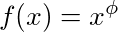

In [1]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our fuction"""   
    return x.pow(e.repeat(x.size(0)))

In [2]:
# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-6
target_exp = 2.0 # real value of the exponent will try to find

# Model definition
# 產生100個 0-10 之間的亂數
x = Variable(torch.rand(n) * 10, requires_grad=False)
print ("x:", x)
print ("x.size(0):", x.size(0))

x: tensor([7.0911, 8.2875, 1.7088, 8.1043, 2.2663, 1.4651, 5.3706, 2.0395, 3.6479,
        8.6218, 7.9598, 8.1108, 8.4967, 8.3015, 5.2564, 3.2427, 3.5293, 4.7671,
        8.9613, 7.0718, 0.2605, 1.5709, 1.7771, 0.3712, 0.2750, 9.7554, 8.4798,
        7.1712, 0.8191, 6.6700, 4.8851, 7.3528, 8.6032, 2.4882, 3.6337, 2.7294,
        5.6665, 8.6039, 2.4825, 6.6125, 9.2388, 4.7001, 7.7984, 0.1211, 4.4815,
        5.1520, 8.2242, 0.3217, 7.1645, 8.2135, 3.4683, 0.8994, 9.3971, 2.8972,
        9.4740, 9.5636, 3.1638, 5.3109, 7.4591, 3.6744, 3.6858, 1.7462, 1.2293,
        9.4386, 2.1133, 5.5104, 2.2513, 5.2062, 2.9075, 8.2924, 6.0209, 5.3987,
        1.4956, 0.2169, 0.3461, 4.4218, 4.0519, 1.6512, 9.7624, 6.8459, 7.6375,
        1.3784, 1.2193, 1.6949, 1.8616, 6.2492, 8.1921, 0.7388, 6.7415, 4.2914,
        6.8719, 2.7297, 2.6065, 1.3098, 5.5612, 0.7140, 4.0305, 1.7423, 3.8585,
        2.0977])
x.size(0): 100


In [3]:
# Model parameter and it's true value
# The true value is 2, but we start from 4 to guess
# 目標指數值 target_exp = 2.0 我們要去逼近
exp = Variable(torch.FloatTensor([target_exp]), requires_grad=False)

#先用 4 試試
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True) # just some starting value, could be random as well

#產生真實y
y = forward(x, exp)
print ("y:", y)

y: tensor([5.0283e+01, 6.8683e+01, 2.9200e+00, 6.5679e+01, 5.1361e+00, 2.1465e+00,
        2.8843e+01, 4.1594e+00, 1.3307e+01, 7.4336e+01, 6.3358e+01, 6.5786e+01,
        7.2193e+01, 6.8915e+01, 2.7630e+01, 1.0515e+01, 1.2456e+01, 2.2725e+01,
        8.0305e+01, 5.0011e+01, 6.7868e-02, 2.4679e+00, 3.1580e+00, 1.3780e-01,
        7.5604e-02, 9.5169e+01, 7.1907e+01, 5.1426e+01, 6.7095e-01, 4.4489e+01,
        2.3864e+01, 5.4063e+01, 7.4015e+01, 6.1910e+00, 1.3204e+01, 7.4497e+00,
        3.2109e+01, 7.4026e+01, 6.1629e+00, 4.3726e+01, 8.5356e+01, 2.2091e+01,
        6.0814e+01, 1.4655e-02, 2.0084e+01, 2.6543e+01, 6.7637e+01, 1.0351e-01,
        5.1331e+01, 6.7462e+01, 1.2029e+01, 8.0900e-01, 8.8306e+01, 8.3940e+00,
        8.9756e+01, 9.1462e+01, 1.0009e+01, 2.8205e+01, 5.5638e+01, 1.3502e+01,
        1.3585e+01, 3.0491e+00, 1.5112e+00, 8.9087e+01, 4.4661e+00, 3.0365e+01,
        5.0685e+00, 2.7105e+01, 8.4534e+00, 6.8763e+01, 3.6251e+01, 2.9146e+01,
        2.2368e+00, 4.7041e-02, 1.197

In [4]:


# a couple of buffers to hold parameter and loss history
loss_history = []
exp_history = []

# Training loop
for i in range(0, 2000):


    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    # 計算損失
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    # 紀錄損失
    #loss_history.append(loss.data[0])
    loss_history.append(loss)
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    # 計算梯度
    loss.backward()
    if ((i % 50) == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss)
      print("exp = %s" % exp_hat.data[0])

    # 手動 Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    #在此一迭代清零以免累積
    exp_hat.grad.data.zero_()

Iteration 0
loss = tensor(30391.9707, grad_fn=<SqrtBackward>)
exp = tensor(4.)
Iteration 50
loss = tensor(397.6861, grad_fn=<SqrtBackward>)
exp = tensor(2.3130)
Iteration 100
loss = tensor(3.1512, grad_fn=<SqrtBackward>)
exp = tensor(2.0035)
Iteration 150
loss = tensor(2.1887, grad_fn=<SqrtBackward>)
exp = tensor(2.0024)
Iteration 200
loss = tensor(1.2332, grad_fn=<SqrtBackward>)
exp = tensor(2.0014)
Iteration 250
loss = tensor(0.2834, grad_fn=<SqrtBackward>)
exp = tensor(2.0003)
Iteration 300
loss = tensor(0.6653, grad_fn=<SqrtBackward>)
exp = tensor(1.9993)
Iteration 350
loss = tensor(1.6113, grad_fn=<SqrtBackward>)
exp = tensor(1.9982)
Iteration 400
loss = tensor(2.5505, grad_fn=<SqrtBackward>)
exp = tensor(1.9971)
Iteration 450
loss = tensor(3.4834, grad_fn=<SqrtBackward>)
exp = tensor(1.9961)
Iteration 500
loss = tensor(3.5620, grad_fn=<SqrtBackward>)
exp = tensor(2.0040)
Iteration 550
loss = tensor(2.5964, grad_fn=<SqrtBackward>)
exp = tensor(2.0029)
Iteration 600
loss = tensor(1

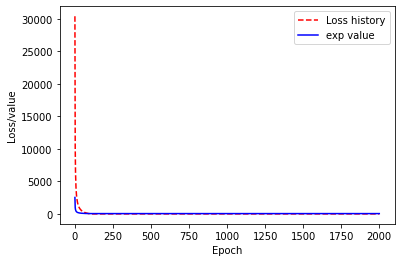

In [5]:
import matplotlib.pyplot as plt

# Create count of the number of epochs
epoch_count = range(1, len(loss_history) + 1)

# Visualize loss history
plt.plot(epoch_count, loss_history, 'r--')
plt.plot(epoch_count, exp_history, 'b-')
plt.legend(['Loss history', 'exp value'])
plt.xlabel('Epoch')
plt.ylabel('Loss/value')
plt.show();

# **Tensorflow  Approach**

In [6]:
#force to use tensorflow 1.0
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our fuction"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    # Training loop
    for i in range(0, 500):
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        if ( i % 50 == 0):
          print("Iteration %d" % i)
          print("loss = %s" % curr_loss)
          print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

Instructions for updating:
non-resource variables are not supported in the long term
Iteration 0
loss = 12185.896
exp = 3.855058
Iteration 50
loss = 551.1184
exp = 2.7520783
Iteration 100
loss = 233.43103
exp = 2.4780593
Iteration 150
loss = 122.07224
exp = 2.3132539
Iteration 200
loss = 65.23846
exp = 2.1949458
Iteration 250
loss = 30.745531
exp = 2.1025743
Iteration 300
loss = 7.578758
exp = 2.0267773
Iteration 350
loss = 0.29427874
exp = 1.9998248
Iteration 400
loss = 0.26786032
exp = 1.9997238
Iteration 450
loss = 0.24144828
exp = 1.9996227
